# Text Classification using Logistic Regression


In [110]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

import seaborn as sns
import matplotlib.pyplot as plt

 ##### read csv file

In [111]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv', # Reads a CSV file into a Pandas DataFrame.
                 
                 encoding='ISO-8859-1', # The encoding argument specifies the character encoding of the CSV file
                 
                 names=[ # The names argument allows you to specify column names for the DataFrame, rather than using the names from the CSV header.
                     
                        'target',
                        'id',
                        'date',
                        'flag',
                        'user',
                        'text'
                        ])

In [112]:
df.head() # Prints the first 5 rows of the DataFrame to let us peek at the data.

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


###### check how many classes we have in the data frame.

In [113]:
df.target.unique()  #We have two classes in data frame.

array([0, 4], dtype=int64)

###### We would like to see how many positive reviews there are and how many negative ones there are in the data frame.

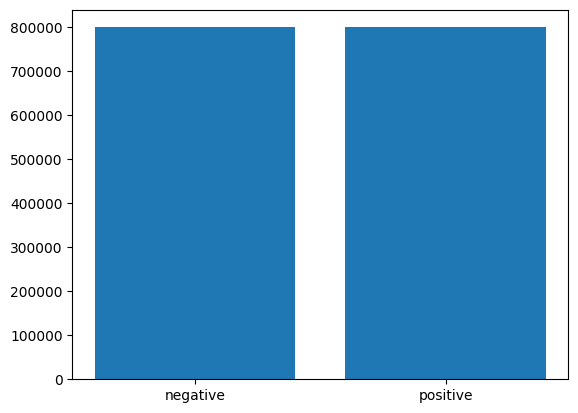

In [114]:
classes = df.target.unique() # Save the classes of the df.
counts = [] # Empty list.


for i in classes: # For one review in classes.
  count = len(df[df.target==i]) # Check the "len" of the two classes.
  counts.append(count) # Append the len of the two classes to "counts".


plt.bar(['negative', 'positive'], counts) # Creating a bar graph of the number of reviews  of the different classes.
plt.show()

###### Split the data into training and testing datasets.



In [115]:

x_text_column = df.text.values # Extract the 'text' column from the DataFrame as a numpy array called x. This contains the text data.
y_target_column = df.target.values # Extract the 'target' column as a numpy array called y. This contains the labels\classes.
 


x_train, x_test, y_train, y_test = train_test_split(x_text_column, y_target_column, test_size=0.20, random_state=32) # Separates the text data and labels from the DataFrame, then splits them into standard train and test sets for modeling, with a 20% size test set.


###### Vectorizing

In [116]:
vectorizer = CountVectorizer() # We will use this method "Count-Vectorization" for the Vectorizing.
vectorizer.fit(x_train) # Separates the sentences in "x_train" into unique tokens/words.

X_train = vectorizer.transform(x_train) # The command gives us a numerical feature vector for each tweet, each value being an index of each unique token.
X_test = vectorizer.transform(x_test) # The same action.

In [117]:
print(x_train[0], '\n', X_train[0]) # An example on the first tweet of the "Count-Vectorization" process.

It was rainy and cloudy in the Windy City today &amp; WF customers had some serious SAD issues! I'm with them, when is summer coming?  
   (0, 56126)	1
  (0, 57443)	1
  (0, 126950)	1
  (0, 129399)	1
  (0, 132544)	1
  (0, 142868)	1
  (0, 226851)	1
  (0, 251981)	1
  (0, 256885)	1
  (0, 257700)	1
  (0, 257841)	1
  (0, 433424)	1
  (0, 455284)	1
  (0, 467402)	1
  (0, 486023)	1
  (0, 501487)	1
  (0, 517082)	1
  (0, 519964)	1
  (0, 528707)	1
  (0, 558260)	1
  (0, 561897)	1
  (0, 562752)	1
  (0, 565913)	1
  (0, 566694)	1


###### Clear the text

In [118]:
import re

# delimiters https://stackoverflow.com/questions/35221535/python-removing-delimiters-from-strings
d = ",.!?/&-:;@'..."
"["+"\\".join(d)+"]"

# clean up the string
s = x_train[0]
print(s)
s = ' '.join(w for w in re.split("["+"\\".join(d)+"]", s) if w)

for i in s.split():
  if len(i)>1: print(i, vectorizer.vocabulary_[i.lower()])

It was rainy and cloudy in the Windy City today &amp; WF customers had some serious SAD issues! I'm with them, when is summer coming? 
It 257841
was 558260
rainy 433424
and 57443
cloudy 129399
in 251981
the 517082
Windy 565913
City 126950
today 528707
amp 56126
WF 561897
customers 142868
had 226851
some 486023
serious 467402
SAD 455284
issues 257700
with 566694
them 519964
when 562752
is 256885
summer 501487
coming 132544


###### Modelling

In [119]:
classifier = LogisticRegression(max_iter=1000) # Building an object of the model.
classifier.fit(X_train, y_train) # Model training.

score = classifier.score(X_test, y_test) # Checking the accuracy of the model. where 1 indicates absolute accuracy and 0 indicates absolute inaccuracy.

print("Accuracy:", score)

Accuracy: 0.79989375


###### Confussion matrix


In [226]:
y_pred = classifier.predict(X_test) # The predication function of the model, into which we will insert the test data.
cm = confusion_matrix(y_test, y_pred, labels=df.target.unique()) # Building the Confessions Matrix.
df_cm = pd.DataFrame(cm, index=df.target.unique(), columns=df.target.unique()) #Arrange the table with the correct classifications.
df_cm

,0,4
0,126385,33936
4,30098,129581


###### Test

In [121]:
tweet = 'PATRIOTIC AMERICANS STAND PROUDLY WITH PRESIDENT TRUMP!!'
vectTweet = vectorizer.transform(np.array([tweet]))  # vectorizes the tweet using our vectorizer

prediction = classifier.predict(vectTweet)  # predicts class of the tweet
print('Tweet is', 'positive' if prediction[0]==4 else 'negative')

Tweet is positive


In [122]:
tweetList = ['Best tweet ever!', 'Mondays are the worst...']
vectTweet = vectorizer.transform(np.array(tweetList))  # vectorized the tweet using our vectorizer.

prediction = classifier.predict(vectTweet)  # predicts class of the tweet
for enum, i in enumerate(tweetList):
  print(i, '| This tweet is', 'positive' if prediction[enum]==4 else 'negative')

Best tweet ever! | This tweet is positive
Mondays are the worst... | This tweet is negative


### Logistic Regression using python code

In [123]:
def sigmoid(z): # The sigmoid provides an answer to classification problems, As in our problem if the passenger survived or not.
        s = 1 / (1 + np.exp(-z)) 
        return s

In [222]:
class Logistic_Regression:
    
    
    # X: order matrix (n * m)
    # Y, A: Two-dimensional vector (1 * m)
    # dw: Two-dimensional vector (n * 1)
    # db: float
    def propagate(self, X, Y):
        m = X.shape[1] # Calculate the properties.
        A = sigmoid(np.dot(self.w.T, X) + self.b) # The sigmoid calculation, its result will determine whether the person survived or not.
        cost = (-1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) # The cost equation is a sum of our loss equation, when its result is smaller, the success of the model prediction is greater.
        dw = (1 / m) * np.dot(X, (A - Y).T) # dw is for gradient descent.
        db = (1 / m) * np.sum(A - Y) # db is for gradient descent.
        return dw, db, cost
    
    
    
    
    # x1: order matrix (m * n)
    # y1: A one-dimensional vector (m)
    # X: order matrix (n * m)
    # Y: Two-dimensional vector (1 * m)
    # w, dw: Two-dimensional vector (n * 1)
    # b, db: float
    def fit(self, x1, y1, num_iterations=1000, learning_rate=0.5):
        X = x1.T # Change the order of the matrix from (m * n) to (n * m)
        Y = y1.reshape(1, -1) # Change the dimension of the vector from (m) to (1 * m), One-dimension to Two-dimension
        self.w = np.zeros((X.shape[0], 1)) # 'w' is an order vector (n * 1), that 'n' is the number of features.
        self.b = 0 # 'b' is a variable of a kind 'flout'.
        costs = [] # A list that will store the results of the cost equation.
        for i in range(num_iterations + 1):
            dw, db, cost = self.propagate(X, Y) # We send the 'X' and 'Y' to the 'propagate' function, aAnd the function will return values that will be stored in these variables.
            self.w -= learning_rate * dw # For the purpose of gradient decent, from a variable 'w' we subtract the learning_rate and dw. 
            self.b -= learning_rate * db # For the purpose of gradient decent, from a variable 'b' we subtract the learning_rate and db. 
            if i % 100 == 0: # Every hundred iterations.
                costs.append(cost) # We will add the cost result to the list of costs.
                print('cost after itertion %i: %f' %(i, cost)) # We print the iteration number together with the cost result.  
        return costs # The 'fit' function return the list of costs.
    
    
    
    # x1: order matrix (m * n)
    # X: order matrix (n * m)
    # Y, A: Two-dimensional vector (1 * m)
    # w: Two-dimensional vector (n * 1)
    def predict(self, x1): # Prediction function.
        X = x1.T # Change the order of the matrix from (m * n) to (n * m)
        # np.dot(1 * n, n * m) = (1 * m) 
        A = sigmoid(np.dot(self.w.T, X) + self.b) # The sigmoid calculation, its result will determine whether the person survived or not.
        # np.where(1 * m)
        Y_pred = np.where(A >= 0.5, 1, 0) # The function 'np.where' goes over the matrix A, and under the condition that if the value in the place is greater than 0.5 then we will classify as 1 and if the value in the place is less than 0.5 then we will classify as 0. 'Y_pred' is a matrix of the same order (1 * m), with values (0,1). 
        return Y_pred.reshape(-1) # The function 'Y_pred.reshape(-1)' changes the two-dimensional vector(matrix) For a one-dimensional vector.


In [223]:
clf2 = Logistic_Regression() # object of Logistic_Regression.

In [224]:
costs = clf2.fit(x_train,y_train) # Training the model with 'x_train ' and 'y_train' data.

(1280000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


TypeError: can't multiply sequence by non-int of type 'float'

In [156]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundred)')
plt.show()
# Now we can see in the graph the learning rate of the model, according to 100 iterations each time.
#You can see that at the beginning the numbers are high, which means the model fails to predict the results well, but after a few hundred iterations we see low numbers in the results, which show that the model is successful in predicting the results in the best way.

NameError: name 'costs' is not defined

In [ ]:
pred3 = clf2.predict(x_train) # Making a prediction on the 'x_train' data.
print(classification_report(y_train, pred3, digits=4)) # Performance review vs y_train.

In [ ]:
pred3 = clf2.predict(x_test) # Making a prediction on the 'x_test' data.
print(classification_report(y_test, pred3, digits=4)) # Performance review vs y_test.

### Confussion matrix between clf to clf2 on data set

In [ ]:
pred_clf = prediction.predict(x_test) # Making a prediction on the data set.
cm = confusion_matrix(y_test, pred_clf) # Making a confusion_matrix on the data set.

pred_clf2 = clf2.predict(x_test) # Making a prediction on the data set.
cm2 = confusion_matrix(y_test, pred_clf2) # Making a confusion_matrix on the data set.

classes = ["did not survive", "survived"]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix for clf")

plt.subplot(1, 2, 2)
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix for clf2")

plt.tight_layout()
plt.show()